In [92]:
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from glob import glob
import cPickle as pickle

In [67]:

path = "/home/tcarver/Documents/HacknLead/"
disease='Diabetes'

In [266]:
def train_classifier(clf,path,disease):
    files=glob(path+'/'+disease+"/"+disease+'_subfile_*.csv')
    DF=[]
    for f in files:
        DF.append(pd.read_csv(f))
    df_diabetes=pd.concat(DF)
    df_diabetes=df_diabetes.reset_index()
    for i,c in enumerate(df_diabetes.columns):
        print i,c
        if i<3:
            continue
        elif i==3:
            d_features=np.array(df_diabetes[c])
        elif i==len(df_diabetes.columns)-1:
            outcomes=np.array(df_diabetes[c])
        else:
            d_features=np.column_stack([d_features,df_diabetes[c]])

    F_train, F_test, O_train, O_test = train_test_split(d_features, outcomes, test_size=.2)
    clf.fit(F_train,O_train)
    with open(path+'/'+disease+"/"+disease+'_Classifier.pkl','w') as output:
        pickle.dump(clf,output)
    scores=clf.predict(F_test)
    diff=scores-O_test
    diagnosis=['Not Diabetic','Diabetic']
    fig=plt.figure(figsize=(20,5))
    #Plotting Result
    f, ax = plt.subplots(nrows=1, ncols=len(list(set(scores))), sharex=True, sharey=True,figsize=(8*len(list(set(scores))),4*len(list(set(scores)))))
    for i,o in enumerate(list(set(scores))):
        ax[i].set_title('Results with Predicted Outcome {}'.format(diagnosis[i]),fontsize='18')
        so=scores[scores==o]
        weights_so=np.ones(len(O_test[scores==o]))/float(len(O_test[scores==o]))
        hist, binedges=np.histogram(O_test[scores==o],weights=weights_so)
        binC=(binedges[:-1]+binedges[1:])/2.
        ax[i].bar(binC,hist)
        ax[i].set_xlabel('Real Outcomes',fontsize='18')
        ax[i].set_ylabel('Fraction of results',fontsize='18')
        ax[i].set_xticks(np.arange(len(list(set(scores))))+0.1)
        #ax[i].set_xticks(binC)
        labels=['OutCome '+str(diagnosis[out]) for out in range(len(list(set(O_test))))]
        ax[i].set_xticklabels(labels,fontsize=14)
    f.subplots_adjust(hspace=0.8)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=True)
    plt.setp([a.get_yticklabels() for a in f.axes[1:]], visible=True)
    plt.subplots_adjust(bottom=0.3)
#     importance = clf.feature_importances_
#     indices = np.argsort(importances)[::-1]
    labelsF= df_diabetes.columns[3:-1]
    print labelsF
#     ax[1,1].set_title("Feature importances")
#     ax[1,1].bar(range(len(df_diabetes.columns)-1), importances[indices],
#        color="r", align="center")
#     plt.xticks(range(len(df_diabetes.columns)-1), labels[indices])
#     plt.xlim([-1, X.shape[1]])
    textstr='Results required for fit:'
    plt.text(0.02, 1.40, textstr, fontsize=20, transform=plt.gcf().transFigure)
    for i,l in enumerate(labelsF):
        plt.text(0.02,0.05*i+1,l,fontsize=16,transform=plt.gcf().transFigure)
    plt.savefig(path+'/'+disease+"/"+disease+'_results.png')
    plt.show()
    return diff

In [267]:
LR=LogisticRegression()

0 level_0
1 Unnamed: 0
2 index
3 Pregnancies
4 Glucose
5 BloodPressure
6 SkinThickness
7 Insulin
8 BMI
9 DiabetesPedigreeFunction
10 Age
11 Outcome
Index([u'Pregnancies', u'Glucose', u'BloodPressure', u'SkinThickness',
       u'Insulin', u'BMI', u'DiabetesPedigreeFunction', u'Age'],
      dtype='object')


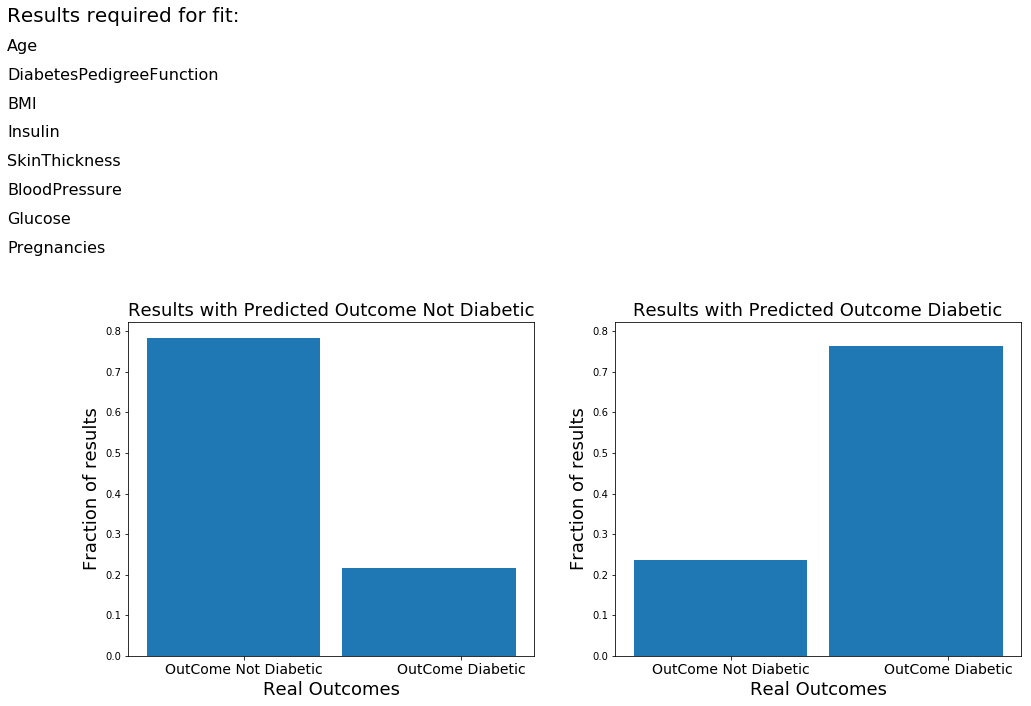

In [268]:
dff2=train_classifier(LR,path,disease)

In [83]:
def merge(path,disease):
    files=glob(path+'/'+disease+"/"+disease+'_subfile_*.csv')
    DF=[]
    for f in files:
        DF.append(pd.read_csv(f))
    dfM=pd.concat(DF)
    dfM=dfM.reset_index()
    print dfM.columns
    return dfM

In [63]:
def split_file(path,disease,df,nfiles=100):
    for i in range(nfiles):
        low_index,high_index=np.ceil(float(len(df))/nfiles*i),np.ceil(float(len(df))/nfiles*(i+1))
        dfT=df.iloc[int(low_index):int(high_index)]
        dfT.to_csv(path+'/'+disease+"/"+disease+'_subfile_{}.csv'.format(i))
    

In [54]:
split_file(path,'Diabetes',diff,nfiles=100)

In [51]:
len(diff)

768

In [ ]:
def get_results